In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
repay=pd.read_csv(r"C:\Users\DELL\Downloads\Repayment.csv",usecols=['Customer','Month','Amount'])
repay.head()

,Customer,Month,Amount
0,A1,12-Jan-04,495414.75
1,A1,3-Jan-04,245899.02
2,A1,15-Jan-04,259490.06
3,A1,25-Jan-04,437555.12
4,A1,17-Jan-05,165972.88


In [3]:
customer=pd.read_csv(r"C:\Users\DELL\Downloads\Customer Acqusition.csv",usecols=['Customer','Age','City','Product','Limit','Company','Segment'])
customer.head()

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [4]:
spend=pd.read_csv(r"C:\Users\DELL\Downloads\Credit Card data.csv",usecols=['Customer','Month','Amount'],engine='python',skipfooter=23)
spend

,Customer,Month,Amount
0,A1,12-Jan-04,338932.1419
1,A1,3-Jan-04,131778.6888
2,A1,15-Jan-04,485981.5167
3,A1,25-Jan-04,452865.8264
4,A1,17-Jan-05,154684.8382
...,...,...,...
1495,A67,9-May-05,461916.0480
1496,A68,10-May-06,269635.6455
1497,A69,11-Jul-06,181524.0464
1498,A70,12-Aug-05,308330.6785


In [5]:
print(spend.shape)
print(repay.shape)
print(customer.shape)

(1500, 3)
(1523, 3)
(100, 7)


In [6]:
spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Customer  1500 non-null   object 
 1   Month     1500 non-null   object 
 2   Amount    1500 non-null   float64
dtypes: float64(1), object(2)
memory usage: 35.3+ KB


In [7]:
repay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Customer  1500 non-null   object 
 1   Month     1500 non-null   object 
 2   Amount    1500 non-null   float64
dtypes: float64(1), object(2)
memory usage: 35.8+ KB


In [8]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Customer  100 non-null    object 
 1   Age       100 non-null    int64  
 2   City      100 non-null    object 
 3   Product   100 non-null    object 
 4   Limit     100 non-null    float64
 5   Company   100 non-null    object 
 6   Segment   100 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 5.6+ KB


In [9]:
#converting object to date_time
spend['Month']=pd.to_datetime(spend['Month'])

In [10]:
repay['Month']=pd.to_datetime(repay['Month'])

In [11]:
customer.isnull().sum()

Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

In [12]:
repay.isnull().sum()

Customer    23
Month       23
Amount      23
dtype: int64

In [13]:
repay.dropna(inplace=True)

In [14]:
repay.isnull().sum()

Customer    0
Month       0
Amount      0
dtype: int64

In [15]:
spend.isnull().sum()

Customer    0
Month       0
Amount      0
dtype: int64

# 1. In the above dataset,

In [16]:
customer.loc[customer.Age<18]=customer['Age'].mean()

In [17]:
Spend_amount=pd.merge(left=customer,right=spend,on='Customer',how='inner')
Spend_amount.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,338932.1419
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,131778.6888
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,485981.5167
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,452865.8264
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,154684.8382


In [18]:
Spend_amount.loc[Spend_amount.Amount>Spend_amount['Limit'],'Amount']=(50*Spend_amount['Limit']).div(100)
Spend_amount.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,338932.1419
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,131778.6888
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,485981.5167
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,452865.8264
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,154684.8382


In [19]:
Spend_amount.loc[Spend_amount.Amount>Spend_amount['Limit'],'Amount']

Series([], Name: Amount, dtype: float64)

In [20]:
repay_amount=pd.merge(left=repay,right=customer,on='Customer',how='inner')
repay_amount.head()

,Customer,Month,Amount,Age,City,Product,Limit,Company,Segment
0,A1,2004-01-12,495414.75,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,A1,2004-01-03,245899.02,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
2,A1,2004-01-15,259490.06,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
3,A1,2004-01-25,437555.12,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
4,A1,2005-01-17,165972.88,76.0,BANGALORE,Gold,500000.0,C1,Self Employed


In [21]:
repay_amount.loc[repay_amount.Amount>repay_amount['Limit'],['Amount']]=repay_amount['Limit']

In [22]:
repay_amount.loc[repay_amount.Amount>repay_amount['Limit'],['Amount']]

,Amount


# 2. From the above dataset create the following summaries:

In [23]:
customer['Customer'].nunique()

95

In [24]:
customer['Segment'].value_counts()

Govt             27
Normal Salary    22
Self Employed    20
Salaried_MNC     13
Salaried_Pvt     12
46.49             6
Name: Segment, dtype: int64

In [25]:
spend['Monthly']=spend['Month'].apply(lambda x: pd.Timestamp.strftime(x,format='%B'))
spend['Yearly']=spend['Month'].apply(lambda x: pd.Timestamp.strftime(x,format='%Y'))
spend.head()

,Customer,Month,Amount,Monthly,Yearly
0,A1,2004-01-12,338932.1419,January,2004
1,A1,2004-01-03,131778.6888,January,2004
2,A1,2004-01-15,485981.5167,January,2004
3,A1,2004-01-25,452865.8264,January,2004
4,A1,2005-01-17,154684.8382,January,2005


In [26]:
round(spend.groupby(['Monthly','Yearly'])['Amount'].mean(),2)

Monthly    Yearly
April      2004      229816.38
           2005      196464.26
           2006      243553.11
August     2005      266078.60
           2006      278103.09
December   2005      238629.45
           2006      176627.26
February   2004      287942.63
           2005      230515.79
           2006      281063.86
January    2004      251132.70
           2005      226264.65
           2006      296280.45
July       2005      317043.53
           2006      229819.85
June       2005      246901.43
           2006      329624.17
March      2004      240123.90
           2006      252861.65
May        2004      234404.06
           2005      248741.63
           2006      254081.52
November   2004      303052.59
           2005      261585.56
           2006      260370.20
October    2005      185212.65
           2006      332037.86
September  2004      254916.04
           2005      148240.58
           2006      219255.05
Name: Amount, dtype: float64

In [27]:
repay['Monthly']=repay['Month'].apply(lambda x: pd.Timestamp.strftime(x,format='%B'))
repay['Yearly']=repay['Month'].apply(lambda x: pd.Timestamp.strftime(x,format='%Y'))
repay.head()

,Customer,Month,Amount,Monthly,Yearly
0,A1,2004-01-12,495414.75,January,2004
1,A1,2004-01-03,245899.02,January,2004
2,A1,2004-01-15,259490.06,January,2004
3,A1,2004-01-25,437555.12,January,2004
4,A1,2005-01-17,165972.88,January,2005


In [28]:
round(repay.groupby(['Yearly','Monthly'])['Amount'].mean(),2)

Yearly  Monthly  
2004    April        259141.68
        February     256702.63
        January      243489.65
        March        252585.28
        May          226162.72
        November     209592.24
        September    184487.85
2005    April        212688.63
        August       264430.92
        December     320379.34
        February     238829.27
        January      240548.10
        July         239871.48
        June         210199.82
        May          263207.37
        November     256695.12
        October      219849.96
        September    247700.17
2006    April        275472.25
        August       224143.99
        December     252736.57
        February     284489.57
        January      293475.39
        July         257936.38
        June         251990.45
        March        240851.27
        May          256920.88
        November     199399.20
        October      260765.48
        September    262533.88
Name: Amount, dtype: float64

In [29]:
Customer_spend_repay=pd.merge(left=Spend_amount,right=repay,on='Customer',how='inner',suffixes=['_spend','_repay'])
Customer_spend_repay.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month_spend,Amount_spend,Month_repay,Amount_repay,Monthly,Yearly
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,338932.1419,2004-01-12,495414.75,January,2004
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,338932.1419,2004-01-03,245899.02,January,2004
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,338932.1419,2004-01-15,259490.06,January,2004
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,338932.1419,2004-01-25,437555.12,January,2004
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,338932.1419,2005-01-17,165972.88,January,2005


In [30]:
total_spend_and_repay=Customer_spend_repay.groupby(['Yearly','Monthly'])['Amount_spend','Amount_repay'].sum()
total_spend_and_repay.head()

C:\Users\DELL\AppData\Local\Temp/ipykernel_5600/122394767.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  total_spend_and_repay=Customer_spend_repay.groupby(['Yearly','Monthly'])['Amount_spend','Amount_repay'].sum()


Amount_spend  Amount_repay
Yearly Monthly                             
2004   April     1.039581e+08  2.033502e+08
       February  8.082124e+07  1.602419e+08
       January   1.019705e+09  1.612821e+09
       March     4.582117e+07  7.650412e+07
       May       7.593050e+07  1.231839e+08

In [31]:
total_spend_and_repay['Profit']=total_spend_and_repay['Amount_repay']-total_spend_and_repay['Amount_spend']

In [32]:
total_spend_and_repay.head()

Amount_spend  Amount_repay        Profit
Yearly Monthly                                           
2004   April     1.039581e+08  2.033502e+08  9.939210e+07
       February  8.082124e+07  1.602419e+08  7.942066e+07
       January   1.019705e+09  1.612821e+09  5.931161e+08
       March     4.582117e+07  7.650412e+07  3.068295e+07
       May       7.593050e+07  1.231839e+08  4.725338e+07

In [33]:
total_spend_and_repay['Intrest_earned']=(2.9*total_spend_and_repay['Profit'])/100
total_spend_and_repay.head()

Amount_spend  Amount_repay        Profit  Intrest_earned
Yearly Monthly                                                           
2004   April     1.039581e+08  2.033502e+08  9.939210e+07    2.882371e+06
       February  8.082124e+07  1.602419e+08  7.942066e+07    2.303199e+06
       January   1.019705e+09  1.612821e+09  5.931161e+08    1.720037e+07
       March     4.582117e+07  7.650412e+07  3.068295e+07    8.898056e+05
       May       7.593050e+07  1.231839e+08  4.725338e+07    1.370348e+06

In [34]:
Customer_spend_repay['Product'].value_counts()

Gold        15249
Platimum    13013
Silver       7082
Name: Product, dtype: int64

In [35]:
Customer_spend_repay.groupby('City')['Amount_spend'].max().sort_values(ascending=False)

City
CHENNAI       499405.4888
BOMBAY        498112.1171
BANGALORE     496905.4582
COCHIN        493830.3932
TRIVANDRUM    492990.1222
DELHI         491626.2947
PATNA         491555.9785
CALCUTTA      491107.0044
Name: Amount_spend, dtype: float64

In [36]:
print('CHENNAI city is having maximum spend')

CHENNAI city is having maximum spend


In [37]:
Spend_amount['Age_group']=pd.cut(Spend_amount['Age'],bins=[20,30,40,50,60,70,80],labels=['21-30,','31-40','41-50','51-60','61-70','71-80'],include_lowest=True)

In [38]:
Spend_amount.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount,Age_group
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,338932.1419,71-80
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,131778.6888,71-80
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,485981.5167,71-80
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,452865.8264,71-80
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,154684.8382,71-80


In [39]:
round(Spend_amount.groupby('Age_group')['Amount'].sum().sort_values(ascending=False),2)

Age_group
21-30,    57870422.94
41-50     43289004.17
31-40     37787170.44
51-60     29965347.62
71-80     28285260.63
61-70     15281817.45
Name: Amount, dtype: float64

In [40]:
print('21-30 age group is spending more money')

21-30 age group is spending more money


In [41]:
top_10_repay=round(Customer_spend_repay.groupby('Customer')['Amount_repay'].max().sort_values(ascending=False),2)
top_10_repay.head(10)

Customer
A11    499930.66
A40    498705.93
A13    498284.19
A53    498258.64
A36    498238.63
A12    498001.25
A89    497237.97
A57    497223.08
A27    496780.73
A30    496754.84
Name: Amount_repay, dtype: float64

In [42]:
#creating new column year in Spend_amount
Spend_amount['Year']=Spend_amount['Month'].apply(lambda x:pd.Timestamp.strftime(x,format='%Y'))
Spend_amount.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount,Age_group,Year
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,338932.1419,71-80,2004
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,131778.6888,71-80,2004
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,485981.5167,71-80,2004
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,452865.8264,71-80,2004
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,154684.8382,71-80,2005


In [43]:
pd.pivot_table?

In [44]:
#creating pivot table 
customer_city_wise_spend=round(pd.pivot_table(data=Spend_amount,index=['City','Year'],columns='Product',values='Amount' ),2)
customer_city_wise_spend.head()

Product              Gold  Platimum    Silver
City      Year                               
BANGALORE 2004  313579.22  29096.90  46874.93
          2005  238532.16  34990.19  62201.34
          2006  277302.59  32482.81  62916.97
BOMBAY    2004  279363.34  42036.21  50000.00
          2005  265911.43  32102.74  46500.51

Text(0.5, 0, 'city_and_year')

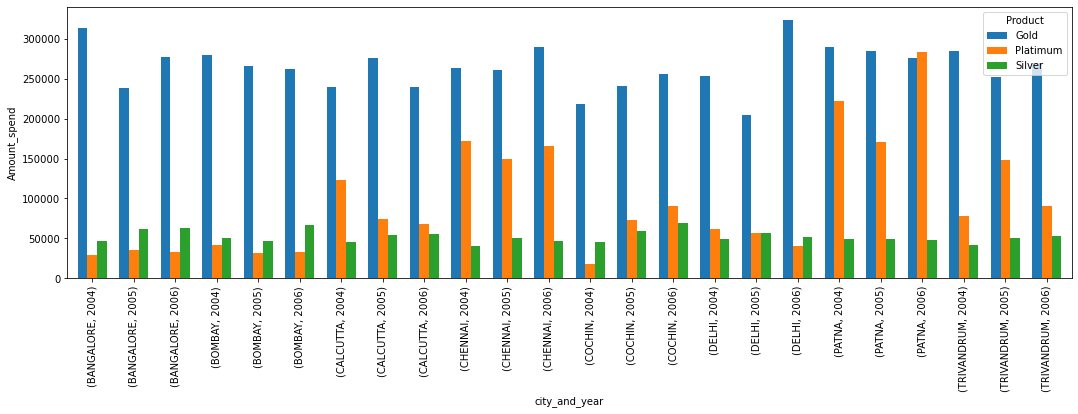

In [45]:
#graphical representation of customer spend city wise
customer_city_wise_spend.plot(kind='bar',figsize=(18,5),width=0.7)
plt.ylabel('Amount_spend')
plt.xlabel('city_and_year')


# 4. Create graphs for

In [46]:
#creating monthly column 
Spend_amount['Monthly']=Spend_amount['Month'].apply(lambda x:pd.Timestamp.strftime(x,format='%B'))
Spend_amount.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount,Age_group,Year,Monthly
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,338932.1419,71-80,2004,January
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,131778.6888,71-80,2004,January
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,485981.5167,71-80,2004,January
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,452865.8264,71-80,2004,January
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,154684.8382,71-80,2005,January


In [47]:
#creating pivot_table on monthly comparsion of total spends, city wise
monthly_compar_city=round(pd.pivot_table(data=Spend_amount,index=['City'],columns='Monthly',values='Amount'),2)
monthly_compar_city

Monthly,April,August,December,February,January,July,June,March,May,November,October,September
City,,,,,,,,,,,,
BANGALORE,140450.38,161616.24,27500.75,169598.56,135259.23,96652.45,186943.42,120563.08,129995.86,132364.76,56312.99,143880.53
BOMBAY,175442.20,121420.82,60593.42,106352.81,178710.00,94442.01,217822.97,183905.94,154587.26,147716.54,168095.41,37440.58
CALCUTTA,123801.87,199553.13,153314.26,143185.10,180537.28,66162.82,74606.13,166163.31,205552.71,132217.25,163583.76,48355.07
CHENNAI,58053.38,189490.79,295459.46,180493.02,154530.08,399498.37,152207.10,129686.09,197260.80,232671.40,223719.30,232311.48
COCHIN,133007.12,129895.00,78586.18,152365.42,137172.23,181455.56,117731.77,185761.91,156443.09,128127.38,180149.05,112337.37
DELHI,130675.91,82690.43,74142.36,119060.43,121525.30,256477.93,NaN,155158.10,143746.66,94907.23,50001.00,37795.99
PATNA,139200.16,190929.43,369526.37,129885.68,130806.24,291745.48,50000.00,149690.91,166691.56,266544.46,340765.64,68178.79
TRIVANDRUM,56893.57,450195.69,181017.33,146185.00,123530.24,185973.02,105344.04,117797.40,174802.44,143659.50,NaN,NaN


<AxesSubplot:xlabel='City'>

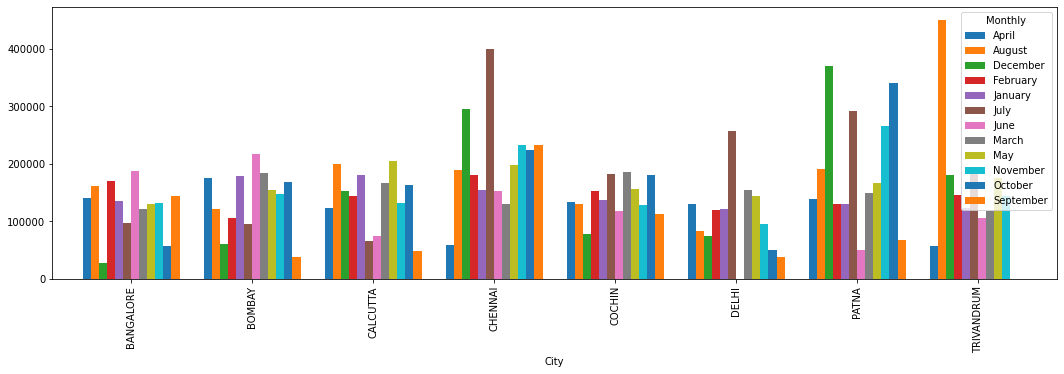

In [48]:
#graphical representation Monthly comparison of total spends, city wise
monthly_compar_city.plot(kind='bar',figsize=(18,5),width=0.8)

In [49]:
# there is no column mentioned type of air tickets

In [50]:
compari_monthly_each_product=round(pd.pivot_table(data=Spend_amount,index=['Product'],columns='Monthly',values='Amount'),2)
compari_monthly_each_product

Monthly,April,August,December,February,January,July,June,March,May,November,October,September
Product,,,,,,,,,,,,
Gold,237445.00,282482.20,232569.95,263208.53,262049.29,233033.92,317753.55,266893.47,254344.39,306131.25,265296.51,196304.29
Platimum,60346.79,54314.49,95609.88,82501.56,90209.10,46090.33,56350.11,87281.04,99850.20,147603.87,113939.82,46967.86
Silver,58094.72,55620.78,63028.82,61383.77,44927.78,56579.86,50000.50,60510.95,51148.47,51176.30,50000.62,46268.28


Text(0.5, 0, 'product')

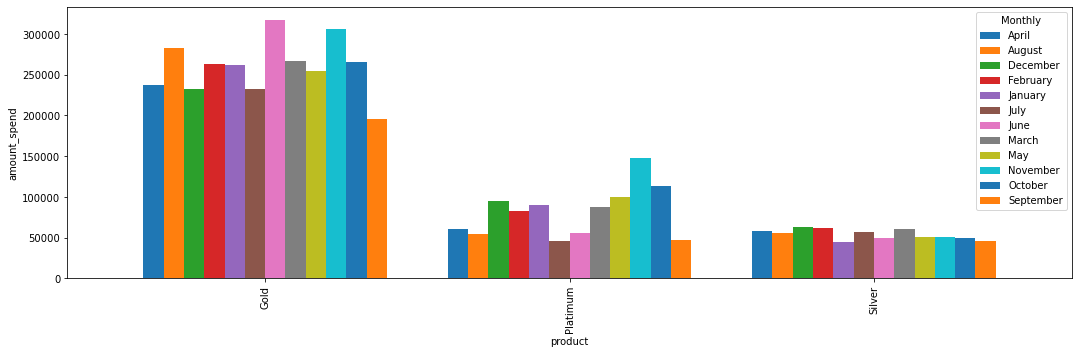

In [51]:
#graphical representation of monthly spend for each product (look for any seasonality
# that exists in terms of spend
compari_monthly_each_product.plot(kind='bar',figsize=(18,5),width=0.8)
plt.ylabel("amount_spend")
plt.xlabel('product')

In [52]:
print('The above it shown in the month of June, Nov, Aug is using gold product is high')

The above it shown in the month of June, Nov, Aug is using gold product is high


# 5. Write user defined PYTHON function to perform the following analysis:

In [53]:
# creating monthly and yearly column in repay_amount
repay_amount["Monthly"]=repay_amount["Month"].apply(lambda x: pd.Timestamp.strftime(x,format='%B'))
repay_amount["Yearly"]=repay_amount["Month"].apply(lambda x: pd.Timestamp.strftime(x,format='%Y'))
repay_amount.head()

,Customer,Month,Amount,Age,City,Product,Limit,Company,Segment,Monthly,Yearly
0,A1,2004-01-12,495414.75,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,January,2004
1,A1,2004-01-03,245899.02,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,January,2004
2,A1,2004-01-15,259490.06,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,January,2004
3,A1,2004-01-25,437555.12,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,January,2004
4,A1,2005-01-17,165972.88,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,January,2005


In [54]:
repay_amount['Product'].value_counts()

Gold        575
Platimum    537
Silver      318
Name: Product, dtype: int64

In [59]:
def summ_report(product,timeperiod):
    if product.lower()=='gold' and timeperiod.lower()=='monthly':
        pivot=repay_amount.pivot_table(index=['Customer','Product','City'],columns='Monthly',values='Amount')
        result=pivot.loc[('Gold',['COCHIN','BANGALORE','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='gold' and timeperiod.lower()=='yearly':
        pivot=repay_amount.pivot_table(index=['Customer','Product','City'],columns='Yearly',values='Amount')
        result=pivot.loc[('Gold',['COCHIN','BANGALORE','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='platimum' and timeperiod.lower()=='monthly':
        pivot=repay_amount.pivot_table(index=['Customer','Product','City'],columns='monthly',values='Amount')
        result=pivot.loc[('Platimum',['COCHIN','BANGALORE','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='platimum' and timeperiod.lower()=='yearly':
        pivot=repay_amount.pivot_table(index=['Customer','Product','City'],columns='Yearly',values='Amount')
        result=pivot.loc[('Platimum',['COCHIN','BANGALORE','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    if product.lower()=='silver' and timeperiod.lower()=='monthly':
        pivot=repay_amount.pivot_table(index=['Customer','Product','City'],columns='monthly',values='Amount')
        result=pivot.loc[('Silver',['COCHIN','BANGALORE','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='silver' and timeperiod.lower()=='yearly':
        pivot=repay_amount.pivot_table(index=['Customer','Product','City'],columns='Yearly',values='Amount')
        result=pivot.loc[('Silver',['COCHIN','BANGALORE','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    return result

In [58]:
summ_report('gold','monthly')

KeyError: 'Gold'